# Simple creation of workspace inputs

_Valerio Ippolito - INFN Sezione di Roma_

This is a very simple tutorial on how to create a tutorial (more properly: a decent statistical analysis example) starting from someone else's paper

We'll take as an example a plot from CMS (some version of a dijet-like analysis with an excess in the tails) and digitize it, fit a couple of background models to it, invent a couple of gaussian signals and argue that their modification can work as a proxy for systematics. And stuff like that.

We won't use ROOT for the marvellous task of fitting, but rather python's `lmfit`:

In [1]:
!pip install lmfit

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import matplotlib.pyplot as plt

The art of digitizing is better taughts by Theorists, who provided us with https://apps.automeris.io/wpd/ and other nicely intuitive tools to extract points from plots.
The plot we are referring to is from the appendix of http://cds.cern.ch/record/2803669

In [3]:
raw_data = [ # from CMS
1.5945261367020767, 6.774581912586716, 
1.6113832877189376, 10.213080082305199, 
1.6339324593685813, 5.1036151013312505, 
1.665323385057881, 4.924071183320089, 
1.7075336532780474, 3.8402374332849734, 
1.7392384268596137, 3.785551073806536, 
1.7799431736026268, 3.1117731612435624, 
1.8142986311413785, 2.685186358449631, 
1.8539372245964403, 2.509333416072097, 
1.8961450318794015, 2.031380443756917, 
1.9369104524922722, 1.907040381245437, 
1.9824155432493917, 1.5414417521040236, 
2.023674370435357, 1.463858920944078, 
2.0724852771965625, 1.1502223853112163, 
2.1123493508827607, 1.1493967479045208, 
2.1553973140518945, 0.8513655176572652, 
2.1941826390848136, 0.8547886669726017, 
2.245534798312993, 0.7154528434427602, 
2.28511281368391, 0.6107501518859475, 
2.3338139754771583, 0.5626987400539565, 
2.3825680532547304, 0.4488193886514791, 
2.4348628380409347, 0.4170943727974063, 
2.492605819513943, 0.3472086131039164, 
2.5441714723894764, 0.3089564766092995, 
2.6057416235929782, 0.26431047118219964, 
2.658796967243513, 0.22752006815845957, 
2.718485796368768, 0.20497602785330604, 
2.7767321523719954, 0.17772344947814334, 
2.84049068178971, 0.1579233670048748, 
2.9031274781434804, 0.13110981905365462, 
2.968466588115957, 0.11665288430847782, 
3.0352762498723758, 0.0964942860725476, 
3.1022083407113086, 0.08666790124674673, 
3.1748532960450566, 0.06679458446141086, 
3.2419757149049917, 0.05960805098929722, 
3.3193708780838884, 0.04733931345795827, 
3.384648558065975, 0.042054443998819954, 
3.470466821253414, 0.0325867462696713, 
3.542261922596676, 0.028715193222693284, 
3.6268257699633724, 0.022499012084975283, 
3.7076274678659287, 0.0184797993102029, 
3.7932674741824677, 0.016136915913417763, 
3.871687468002966, 0.012805461837378487, 
3.9616052999594866, 0.010784329588491688, 
4.047767055116135, 0.007945373019512939, 
4.130067439735637, 0.006387741892713237, 
4.2297934287439505, 0.005062565190158038, 
4.302189419753594, 0.00510452100582867, 
4.386489789422147, 0.003078112730891864, 
4.463864673926383, 0.0030391655334750336, 
4.56807803974072, 0.0016766774694046283, 
4.650053009615509, 0.0017257155377280306, 
4.766841659181161, 0.0019566033313030366, 
4.843791662724673, 0.001999278737749049, 
4.9263580571354835, 0.000651360119404615, 
5.013809700474777, 0.0006478291752452424, 
5.1179882495209785, 0.0004816412836281495, 
5.21244109226914, 0.0004705275617889206, 
5.343399026808922, 0.00047252898841463416, 
5.42965626030763, 0.0004755471019663482, 
5.522209196420389, 0.00024331397786600718, 
5.584700666785488, 0.00017385163195635187, 
5.623992189739429, 0.0002626314400233126, 
5.737178669728404, 0.00013751242694707354, 
5.845764891463685, 0.00014698868148602698, 
5.8874763068942215, 0.00012718221045244306, 
6.005453011312794, 0.00014856908839241815, 
5.990291894352173, 0.00009477763627720359, 
6.093159125067489, 0.00016340828662853225, 
6.177742334289245, 0.000029904594237265562, 
6.23723175944406, 0.00003942202209980606, 
6.288171627290685, 0.000029044959718191262, 
6.640368345884062, 0.0000537410644789059, 
6.7249231384815475, 0.0000414233384576809, 
6.7571464365103715, 0.00005783656254366704, 
6.857554873343088, 0.00003470861141442978, 
8.011328074455147, 0.00004980660854317575, 
8.125024110193316, 0.00004874255908575144, 
]

This was merely a cut-and-paste (after the operation of add-the-commas) from the plot digitizer. We actually prefer to use evenly-spaced x-axis values, and to deal with a matrix, so:

In [4]:
data = np.array(raw_data).reshape(-1, 2)
data[:, 0] = np.arange(1.59, 1.59+0.1 * data.shape[0], 0.1)

There is a complete literature on fitting dijet-like shapes; its summary is provided by the three fit functions CMS tried to use for their plot. Let's implement them in python, and choose one of them to create an `lmfit` likelihood model.

In [5]:
from lmfit import Model
# https://cds.cern.ch/record/2803669/files/EXO-21-010-pas.pdf sec. 7, page 17

def bkg_model(x, p0, p1, p2, p3, p4):
    s = x / 13. # x / sqrt(s)
    return p0 * np.power(1-np.power(s, 1/3.), p1) / np.power(s, p2 + p3 * np.log(x) + p4 * np.power(np.log(x), 2))

def bkg_syst1(x, p0, p1, p2, p3, p4):
    s = x / 13. # x / sqrt(s)
    return p0 * np.power(1-s, p1) / np.power(s, p2 + p3 * np.log(x) + p4 * np.power(np.log(x), 2))

def bkg_syst2(x, p0, p1, p2, p3, p4):
    s = x / 13. # x / sqrt(s)
    return p0 * np.exp(-p1* s -p2*np.power(x, 2) - p3 * np.power(x, 3)) / np.power(s, p4)

bmodel = Model(bkg_model)
print(f'parameter names: {bmodel.param_names}')
print(f'independent variables: {bmodel.independent_vars}')


parameter names: ['p0', 'p1', 'p2', 'p3', 'p4']
independent variables: ['x']


Fitting in `lmfit` is somehow a better experience than in MINUIT, yet a painful one: without initial guesses or boundaries, you have no hope to get a reasonable result.

In [6]:
yfit = data[:,1]#[data[:,0] > 5]
xfit = data[:,0]#[data[:,0] > 5]
#params = bmodel.guess(yfit, x=xfit)
bmodel.set_param_hint('p0', min=0.)
bmodel.set_param_hint('p1', min=0.)
bmodel.set_param_hint('p2', min=0.)
bmodel.set_param_hint('p3', min=0.5)
bmodel.set_param_hint('p4', min=2)
params = bmodel.make_params(p0=6e-8, p1=1, p2=8, p3=1.5, p4=2) # never put this line before all parameter hints were stated, or they shall be ignored
res = bmodel.fit(yfit, params, x=xfit) # this may fail before the plot - investigate the binning then...
print(res.fit_report())

[[Model]]
    Model(bkg_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 143
    # data points      = 78
    # variables        = 5
    chi-square         = 13.9866100
    reduced chi-square = 0.19159740
    Akaike info crit   = -124.051454
    Bayesian info crit = -112.267910
##  Warning: uncertainties could not be estimated:
    p0:  at boundary
    p4:  at initial value
    p4:  at boundary
[[Variables]]
    p0:  9.7230e-09 (init = 6e-08)
    p1:  0.70816201 (init = 1)
    p2:  8.83090495 (init = 8)
    p3:  1.64098121 (init = 1.5)
    p4:  2.00000000 (init = 2)


Life gives us a hard time at imagining better signal models than gaussians:

In [7]:
def signal(x, A, mass, reso):
    z = (x-mass)/reso
    return A / (np.sqrt(2 * np.pi) * reso) * np.exp(-np.power(z, 2)/2.)

Plotting, or: the moment in which dreams become alive. We superimpose to the data the fitted background spectrum, the signal and some variations of it.

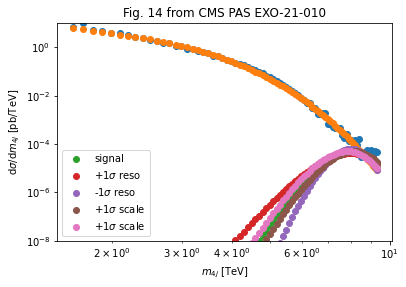

In [8]:
plt.scatter(data[:,0], data[:,1])
plt.scatter(data[:,0], bmodel.eval(params, x=data[:,0])) # this is how you evaluate the bkg function using its best-fit parameters
plt.scatter(data[:,0], signal(x=data[:,0], A=0.0001, mass=8, reso=0.1*8), label='signal')
plt.scatter(data[:,0], signal(x=data[:,0], A=0.0001, mass=8, reso=0.12*8), label='+1$\sigma$ reso')
plt.scatter(data[:,0], signal(x=data[:,0], A=0.0001, mass=8, reso=0.08*8), label='-1$\sigma$ reso')
plt.scatter(data[:,0], signal(x=data[:,0], A=0.0001, mass=8*1.02, reso=0.1*8), label='+1$\sigma$ scale')
plt.scatter(data[:,0], signal(x=data[:,0], A=0.0001, mass=8*0.98, reso=0.1*8), label='+1$\sigma$ scale')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$m_{4j}$ [TeV]')
plt.ylabel('d$\sigma$/d$m_{4j}$ [pb/TeV]')
plt.title('Fig. 14 from CMS PAS EXO-21-010')
plt.ylim(1e-8,1e1)
plt.legend()

We lied! We need ROOT (or at least _we'll use ROOT_) to create ROOT histograms

In [9]:
import ROOT

Welcome to JupyROOT 6.24/06


We first open the file which will then automatically contain all our histograms (otherwise, we'll have to call `SetDirectory` on each of them)

In [10]:
f = ROOT.TFile.Open('mytest.root', 'RECREATE')

We then create a convenience function to fill a histogram based on a set of data:

In [11]:
def create_histo(name, data, bins, xmin, xmax):
    h = ROOT.TH1F(f'h_{name}', name, bins, xmin, xmax)
    for i in range(1, h.GetNbinsX()+1):
        h.SetBinContent(i, data[i-1])
    return h

We do some rescaling as the spectrum we fitted is technically a $d\sigma/dm_{4l}$ spectrum, and not the distribution of the number of events in $m_{4l}$:

In [12]:
lumi = 1000 # in the magic world in which A x eff = 1

n_bins = data.shape[0]
xmin = data[0, 0]
xmax = data[-1, 0]
h_data = create_histo('data', lumi * data[:, 1], n_bins, xmin, xmax)
h_bkg  = create_histo('bkg_nominal', lumi * bmodel.eval(params, x=data[:,0]), n_bins, xmin, xmax)
h_sig  = create_histo('sig_nominal', lumi * signal(x=data[:,0], A=0.0001, mass=8, reso=0.1*8), n_bins, xmin, xmax)
h_sig_reso_p1  = create_histo('sig_reso_p1', lumi * signal(x=data[:,0], A=0.0001, mass=8, reso=0.15*8), n_bins, xmin, xmax)
h_sig_reso_m1  = create_histo('sig_reso_m1', lumi * signal(x=data[:,0], A=0.0001, mass=8, reso=0.05*8), n_bins, xmin, xmax)
h_sig_scale_p1 = create_histo('sig_reso_p1', lumi * signal(x=data[:,0], A=0.0001, mass=(8*1.1), reso=0.1*(8*1.1)), n_bins, xmin, xmax)
h_sig_scale_m1 = create_histo('sig_reso_m1', lumi * signal(x=data[:,0], A=0.0001, mass=(8*0.9), reso=0.1*(8*0.9)), n_bins, xmin, xmax)

Warning in <TFile::Append>: Replacing existing TH1: h_sig_reso_p1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_sig_reso_m1 (Potential memory leak).


Let's make sure our plot makes sense

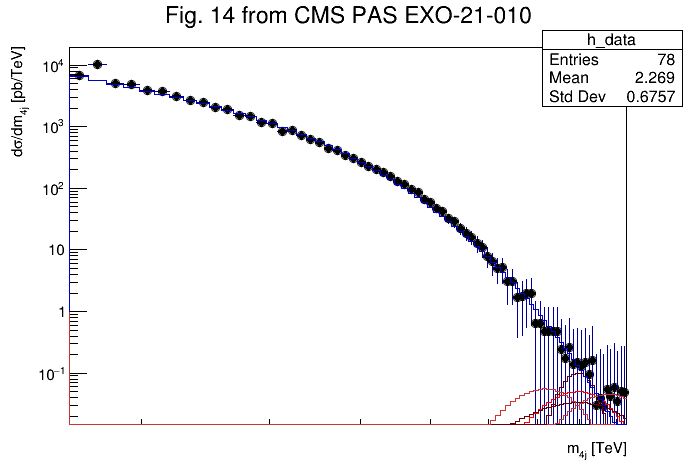

In [13]:
c = ROOT.TCanvas()

h_data.Draw('pe')
h_data.SetMarkerStyle(20)
h_data.SetMarkerColor(ROOT.kBlack)
h_data.SetTitle('Fig. 14 from CMS PAS EXO-21-010')

h_sig.SetLineColor(ROOT.kRed)
h_sig.Draw('hist same')
h_sig_reso_p1.SetLineColor(ROOT.kRed+3)
h_sig_reso_p1.Draw('hist same')
h_sig_scale_p1.SetLineColor(ROOT.kRed-3)
h_sig_scale_p1.Draw('hist same')
h_sig_reso_m1.SetLineColor(ROOT.kRed+3)
h_sig_reso_m1.Draw('hist same')
h_sig_scale_m1.SetLineColor(ROOT.kRed-3)
h_sig_scale_m1.Draw('hist same')


h_bkg.SetLineColor(ROOT.kBlue+1)
h_bkg.Draw('hist same')

h_data.GetXaxis().SetTitle('m_{4j} [TeV]')
h_data.GetYaxis().SetTitle('d#sigma/dm_{4j} [pb/TeV]')
c.SetLogx()
c.SetLogy()
c.Draw()

Finally, we write to file the histograms, for subsequent use in the creation of the workspace:

In [14]:
f.Write()
f.Close()